## Multi-ROI subcortex mesh demo

Automatically gather all non-zero labels from a NIfTI atlas, extract meshes, and visualize them together in multiple views using PyVista.

In [1]:
import numpy as np
import pyvista as pv
from subcortex_vis.mesh_viz import (
    load_nii_volume,
    extract_label_meshes,
    visualize_meshes,
)


In [2]:
# Paths and parameters
nii_path = "atlas/Tian_Subcortex_S2_3T.nii.gz"
sigma = 0.8
smooth_iter = 30


In [3]:
# Load volume and collect all non-zero labels
volume, spacing, origin = load_nii_volume(nii_path)
unique_labels = np.unique(volume)
labels = [float(v) for v in unique_labels if v != 0]
print(f"Volume shape: {volume.shape}, spacing: {spacing}")
print(f"Labels found (non-zero): {labels}")


Volume shape: (91, 109, 91), spacing: (2.0, 2.0, 2.0)
Labels found (non-zero): [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0]


In [4]:
# Extract meshes for each label
label_meshes = extract_label_meshes(
    volume, labels, spacing, origin, sigma=sigma, smooth_iter=smooth_iter, threshold=0.5
)
print(f"Extracted {len(label_meshes)} meshes")


Extracted 32 meshes


In [5]:
# Assign colors per ROI
palette = ["#4C78A8", "#E45756", "#72B7B2", "#F28E2B", "#59A14F", "#B279A2", "#FF9DA6", "#9C755F"]
mesh_color_pairs = []
for idx, (lbl, mesh) in enumerate(label_meshes):
    color = palette[idx % len(palette)]
    mesh_color_pairs.append((mesh, color))


View: left


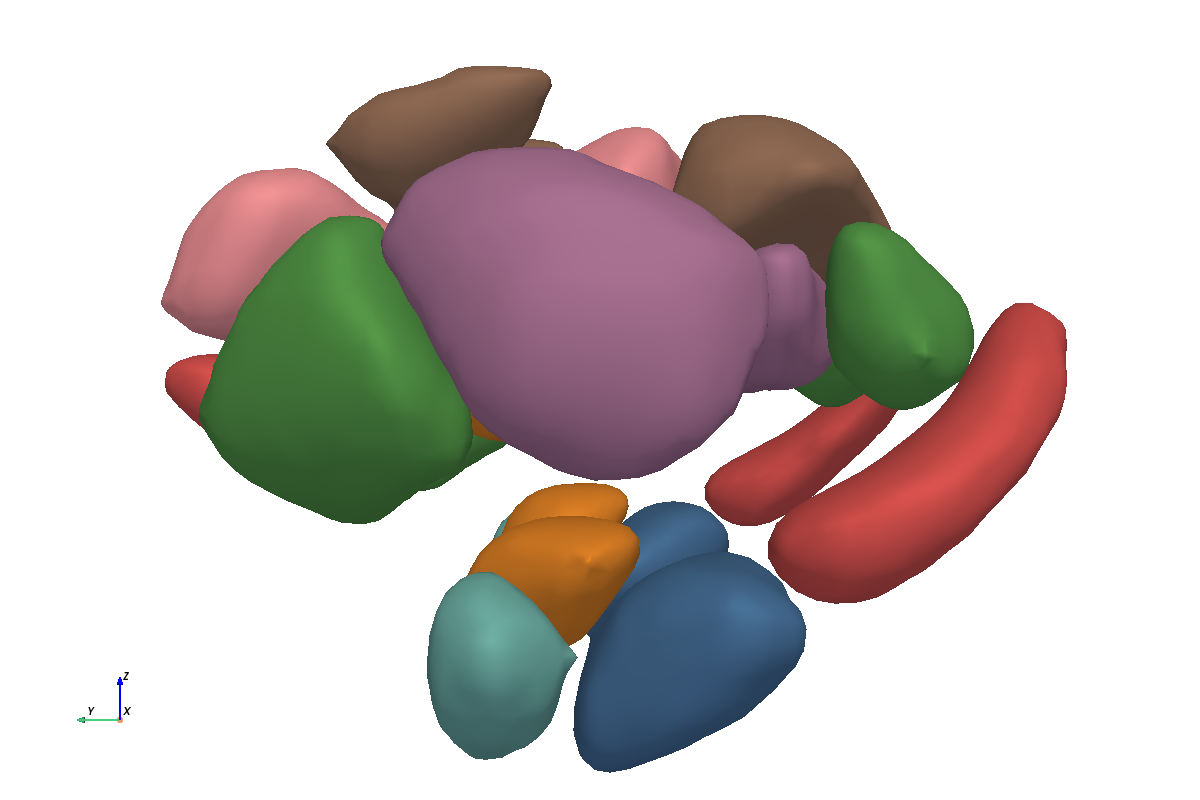

View: right


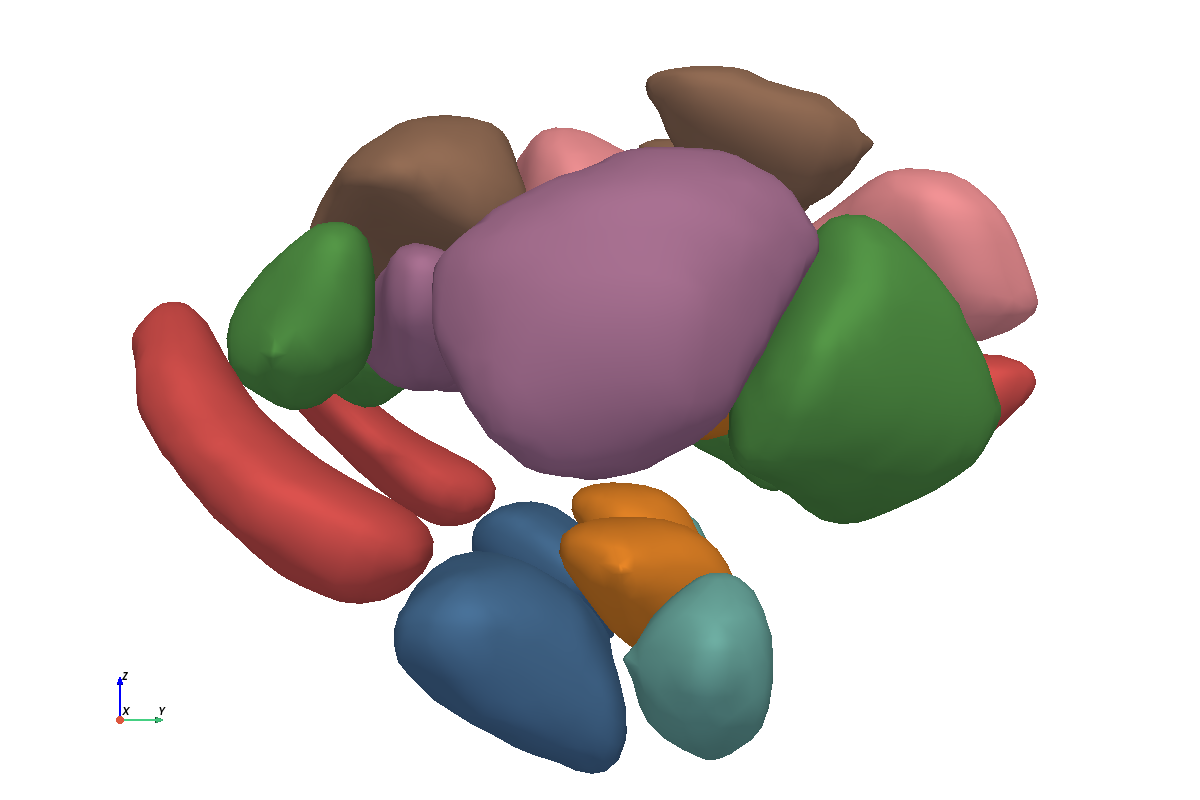

View: top


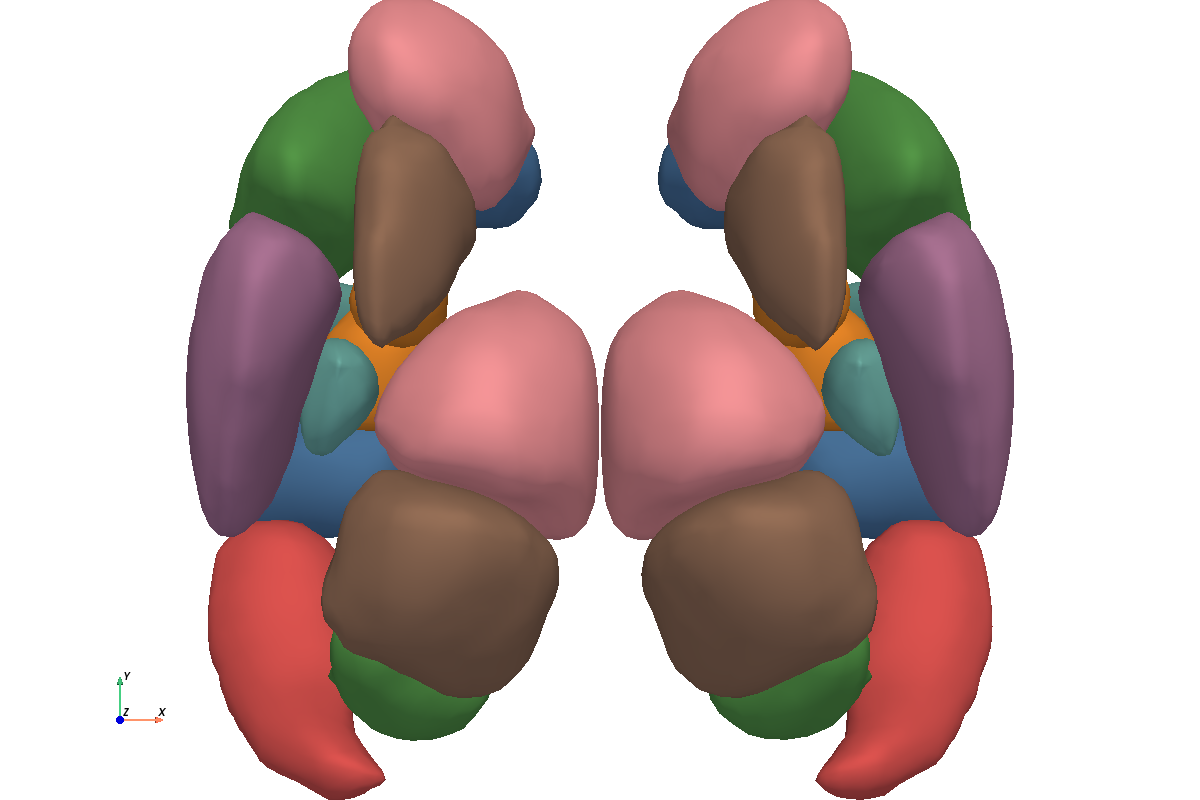

View: front


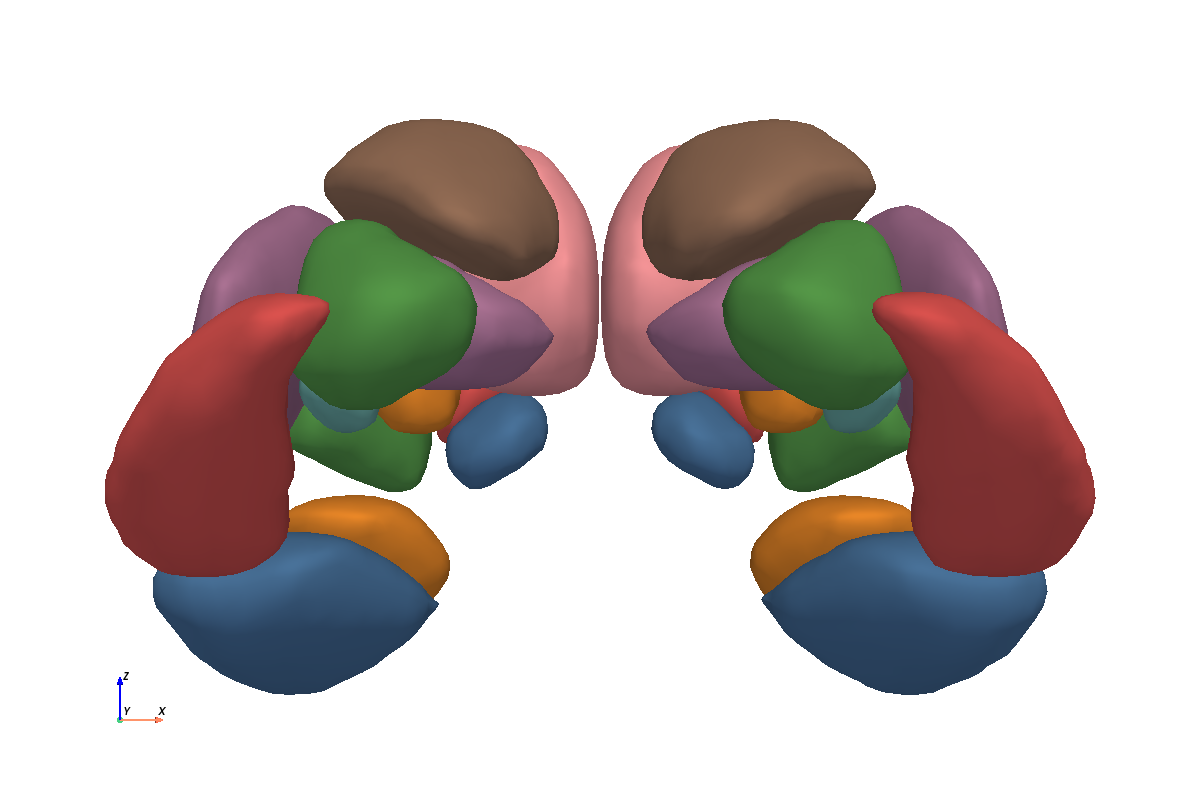

View: iso


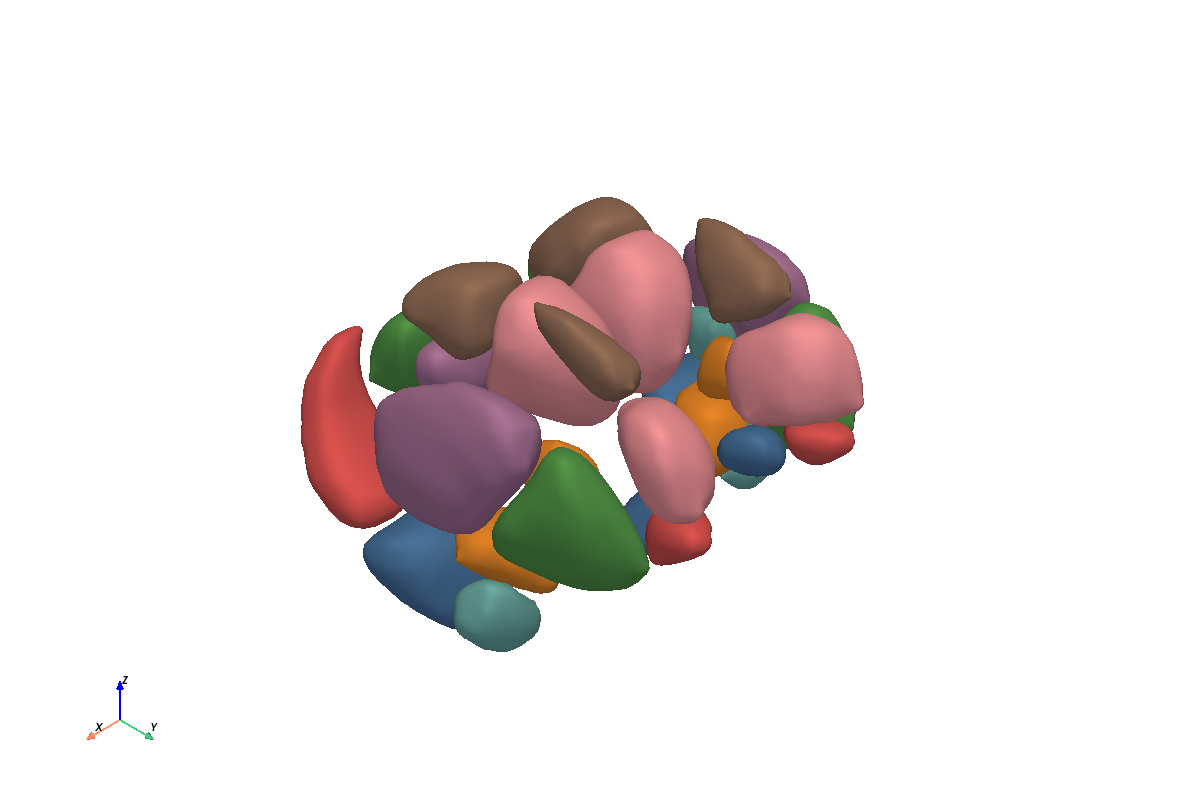

In [6]:
# Visualize all labels together across multiple views
pv.set_jupyter_backend('static')
for view in ['left', 'right', 'top', 'front', 'iso']:
    print(f"View: {view}")
    visualize_meshes(mesh_color_pairs, view=view, background='white')
